# Proyecto ASHARE

### 1. Exploración del Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
#Cargamos el dataset train, nos quedaria cargar los otros dos con los que trabajaremos
train_df = pd.read_csv("train.csv")
train_df.head(3)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0


In [4]:
#Analizamos el dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [5]:
#Analizamos el dataset
train_df.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')

In [17]:
#Analizamos los estadisticos descriptivos: promedio de consumo
train_df.groupby('meter')['meter_reading'].describe()

,count,mean,std,min,25%,50%,75%,max
meter,,,,,,,,
0,12060910.0,167.133789,371.017456,0.0,19.5000,62.831900,170.074997,79769.0
1,4182440.0,630.223145,7981.263672,0.0,11.3288,120.487000,464.313995,880374.0
2,2708713.0,13725.946289,418120.062500,0.0,45.7500,257.812012,1035.319946,21904700.0
3,1264037.0,385.561462,2505.033936,0.0,0.0000,39.623699,241.285004,160187.0


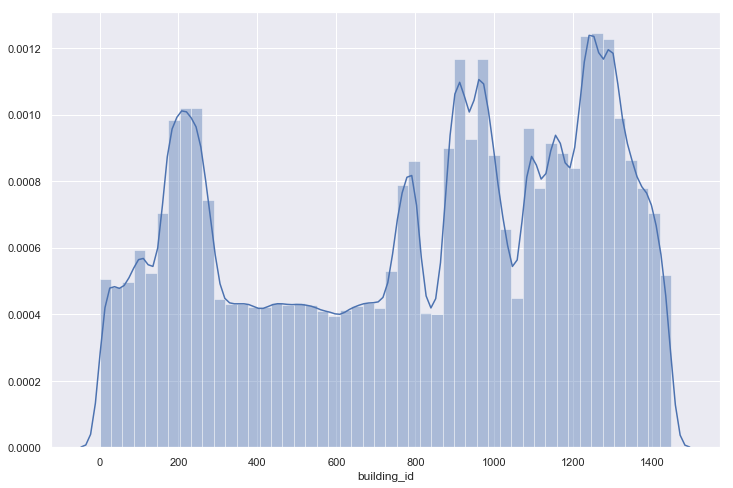

In [19]:
sns.distplot(train_df['building_id'])

In [6]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(train_df.shape[0]))

El dataset que vamos a trabajar aquí tiene 20216100 observaciones


In [7]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
train_df = reduce_mem_usage(train_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)


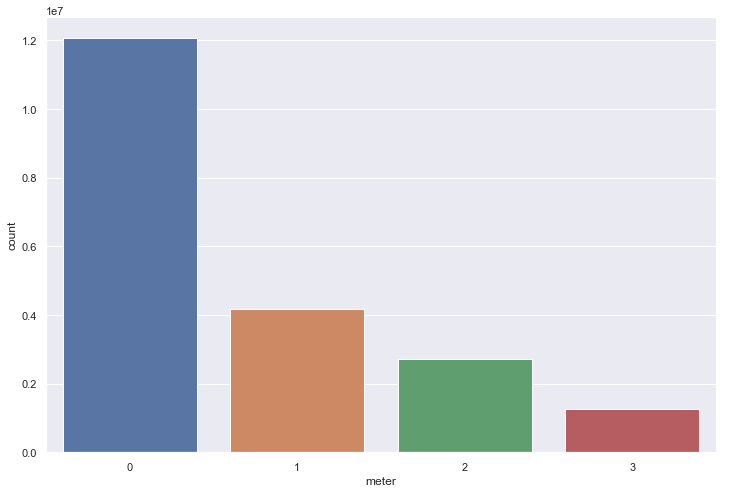

In [9]:
#Graficamos la columna meter para analizar la distribucion de cada medidor
sns.set(style="darkgrid")
ax = sns.countplot(x="meter", data=train_df)

In [11]:
#Buscamos librerias nuevas para plotear la distribución del consumo de cada metrica https://docs.bokeh.org/en/latest/docs/installation.html
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

output_notebook()
def make_plot(title, hist, edges, xlabel):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], #ejes? 
           fill_color="#1E90FF", line_color="white", alpha=0.5)

    p.y_range.start = 0
    p.xaxis.axis_label = f'Log of {xlabel} meter reading'
    p.yaxis.axis_label = 'Probability'
    p.grid.grid_line_color="white"
    return p
temp_df = train_df[train_df["meter"]==0]
hist, edges = np.histogram(np.log1p(temp_df["meter_reading"].values), density=True, bins=50)
p1 = make_plot("Meter Reading Distribution for Electricity meter", hist, edges, "electricity")

temp_df = train_df[train_df["meter"]==1]
hist, edges = np.histogram(np.log1p(temp_df["meter_reading"].values), density=True, bins=50)
p2 = make_plot("Meter Reading Distribution for Chilled Water meter", hist, edges, 'chill water')

temp_df = train_df[train_df["meter"]==2]
hist, edges = np.histogram(np.log1p(temp_df["meter_reading"].values), density=True, bins=50)
p3 = make_plot("Meter Reading Distribution for Steam meter", hist, edges, 'steam')

temp_df = train_df[train_df["meter"]==3]
hist, edges = np.histogram(np.log1p(temp_df["meter_reading"].values), density=True, bins=50)
p4 = make_plot("Meter Reading Distribution for Hot Water meter", hist, edges, 'hot water')

show(gridplot([p1,p2,p3,p4], ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

In [14]:
temp_df = train_df[train_df["building_id"==1298]].reset_index(drop=True)

import datetime

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

tdf = temp_df[temp_df["meter"]==0]
cnt_srs = tdf["meter_reading"]
cnt_srs.index = tdf["timestamp"]
trace1 = scatter_plot(cnt_srs, 'red')

tdf = temp_df[temp_df["meter"]==1]
cnt_srs = tdf["meter_reading"]
cnt_srs.index = tdf["timestamp"]
trace2 = scatter_plot(cnt_srs, 'blue')

tdf = temp_df[temp_df["meter"]==2]
cnt_srs = tdf["meter_reading"]
cnt_srs.index = tdf["timestamp"]
trace3 = scatter_plot(cnt_srs, 'green')

tdf = temp_df[temp_df["meter"]==3]
cnt_srs = tdf["meter_reading"]
cnt_srs.index = tdf["timestamp"]
trace4 = scatter_plot(cnt_srs, 'purple')

subtitles = ["Meter reading over time for electricity meter for building 1298",
             "Meter reading over time for chill water meter for building 1298",
             "Meter reading over time for steam meter for building 1298",
             "Meter reading over time for hot water meter for building 1298"
            ]
fig = subplots.make_subplots(rows=4, cols=1, vertical_spacing=0.08,
                          subplot_titles=subtitles)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)')
py.iplot(fig, filename='meter-plots')

KeyError: False

In [10]:
import plotly.graph_objects as go


In [9]:
#Fraccionamos el dataset y seleccionamos una muestra
muestra = train_df.sample(frac=0.09, replace=True, random_state=1)

### 3. Merge 

In [10]:
build_df = pd.read_csv("building_metadata.csv")

In [11]:
join_1=muestra.merge(build_df)
join_1.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,564,0,2016-08-20 09:00:00,29.010000,3,Public services,89315,NaN,NaN
1,564,0,2016-06-26 20:00:00,13.080000,3,Public services,89315,NaN,NaN
2,564,0,2016-05-17 19:00:00,10.480000,3,Public services,89315,NaN,NaN
3,564,0,2016-08-29 11:00:00,35.200001,3,Public services,89315,NaN,NaN
4,564,0,2016-09-14 07:00:00,17.110001,3,Public services,89315,NaN,NaN


In [12]:
weather = pd.read_csv("weather_train.csv")
weather.head(3)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0


In [13]:
join_2=join_1.merge(weather)
join_2.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,564,0,2016-08-20 09:00:00,29.010000,3,Public services,89315,NaN,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
1,473,0,2016-08-20 09:00:00,116.209999,3,Public services,46007,1950.0,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
2,556,0,2016-08-20 09:00:00,1402.609985,3,Healthcare,450000,2012.0,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
3,424,0,2016-08-20 09:00:00,33.310001,3,Public services,32527,NaN,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
4,452,0,2016-08-20 09:00:00,244.619995,3,Education,155100,1931.0,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1


In [14]:
#Estandarizamos la fecha 
join_2["timestamp"] = pd.to_datetime(join_2["timestamp"], format='%Y-%m-%d %H:%M:%S')
join_2.head(5)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,564,0,2016-08-20 09:00:00,29.010000,3,Public services,89315,NaN,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
1,473,0,2016-08-20 09:00:00,116.209999,3,Public services,46007,1950.0,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
2,556,0,2016-08-20 09:00:00,1402.609985,3,Healthcare,450000,2012.0,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
3,424,0,2016-08-20 09:00:00,33.310001,3,Public services,32527,NaN,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1
4,452,0,2016-08-20 09:00:00,244.619995,3,Education,155100,1931.0,NaN,24.4,2.0,21.7,0.0,1013.2,350.0,2.1


In [15]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(join_2.shape[0]))

El dataset que vamos a trabajar aquí tiene 1811400 observaciones


In [16]:
#Observamos los valores nulos
join_2.isna().sum()

building_id                 0
meter                       0
timestamp                   0
meter_reading               0
site_id                     0
primary_use                 0
square_feet                 0
year_built            1089541
floor_count           1496751
air_temperature           550
cloud_coverage         786975
dew_temperature           852
precip_depth_1_hr      329784
sea_level_pressure     102639
wind_direction         122628
wind_speed               4836
dtype: int64

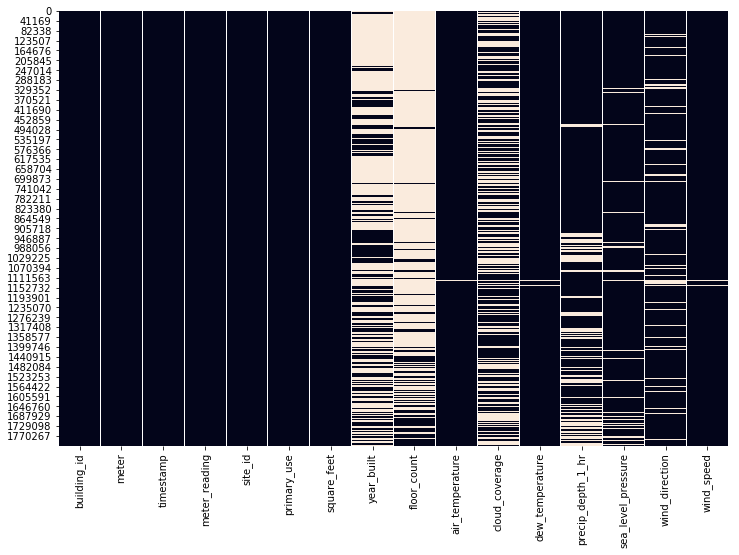

In [17]:
#Visualizamos los valores nulos
sns.heatmap(join_2.isnull(), cbar=False)

In [ ]:
#Podemos ver en los resultados que los atributos `wind_direction`, `sea_level_pressure`y `precip_depth_1_hr` tienen un elevado porcentaje de faltantes.  
#Una opción sería descartar estas columnas en el análisis. 
join_2 = join_2.drop(['wind_direction', 'sea_level_pressure','precip_depth_1_hr'], axis = 1)

In [ ]:
#Eliminamos los valores nulos 
join_2 = join_2.dropna(subset =['year_built', 'floor_count','air_temperature','cloud_coverage','dew_temperature','wind_speed'])

In [18]:
#Comenzamos a observar las correlaciones 
join_2.corr()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
building_id,1.000000,0.222533,0.008728,0.980931,0.087914,-0.247591,-0.353626,-0.314512,-0.204312,-0.109934,0.020920,0.075108,0.049452,0.004175
meter,0.222533,1.000000,0.017475,0.254259,0.132755,-0.000875,0.177130,-0.010821,-0.177341,-0.080013,-0.003374,-0.052507,-0.022862,-0.081074
meter_reading,0.008728,0.017475,1.000000,0.011820,0.024091,0.113947,0.123017,-0.004501,0.003503,-0.003774,0.000692,-0.005131,0.000418,0.007122
site_id,0.980931,0.254259,0.011820,1.000000,0.091226,-0.213029,-0.341740,-0.307419,-0.179967,-0.134785,0.020903,0.054135,0.050405,0.011918
square_feet,0.087914,0.132755,0.024091,0.091226,1.000000,0.136275,0.582396,-0.015143,-0.042806,-0.023104,0.001755,-0.021074,-0.011292,-0.035485
year_built,-0.247591,-0.000875,0.113947,-0.213029,0.136275,1.000000,0.146440,0.175399,0.062331,0.119607,0.008685,-0.015693,-0.062440,-0.046813
floor_count,-0.353626,0.177130,0.123017,-0.341740,0.582396,0.146440,1.000000,-0.187824,-0.105837,-0.177671,0.009469,-0.049300,0.069555,-0.021937
air_temperature,-0.314512,-0.010821,-0.004501,-0.307419,-0.015143,0.175399,-0.187824,1.000000,0.046165,0.750110,-0.003807,-0.315200,-0.093974,-0.082173
cloud_coverage,-0.204312,-0.177341,0.003503,-0.179967,-0.042806,0.062331,-0.105837,0.046165,1.000000,0.134384,0.118319,-0.149836,0.040894,0.243370
dew_temperature,-0.109934,-0.080013,-0.003774,-0.134785,-0.023104,0.119607,-0.177671,0.750110,0.134384,1.000000,0.070835,-0.220085,-0.170486,-0.142767


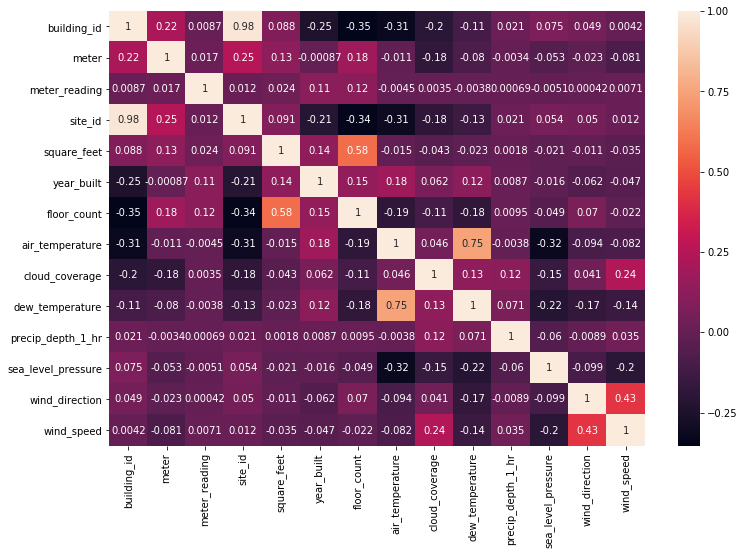

In [19]:
#Graficamos las correlaciones, las variables que tienen corr fuerte +0,5 nos permiten hacer un analisis superficial
#vamos a continuar 
join_2.corr()
sns.heatmap(join_2.corr(), annot = True)

In [ ]:
sns.distplot(join_2['meter'])

In [ ]:
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, c='green')
sns.despine()

In [ ]:
#Grafico
sns.distplot(train_df['meter_reading'])

### 4. Tratamiento de Valores Nulos

In [ ]:
train = train_df.set_index(['timestamp'])

In [ ]:
#Eliminamos los valores nulos 
train_df = train_df.dropna(subset =['meter_reading'])

In [ ]:
#Compruebo que no queden 
train_df.meter_reading.isna().sum()

In [ ]:
sns.heatmap(train_df.isnull(), cbar=False)

## 5. Outliers

In [ ]:
sns.boxplot(train_df['meter_reading'])

In [ ]:
train_df['meter_reading'].describe()

## 6. Merge

In [ ]:
build_df = pd.read_csv("building_metadata.csv")
build_df.head(3)

In [ ]:
df_new = pd.merge(train_df, build_df, on='building_id')
df_new.head(5)

In [ ]:
df_new.isna().sum()